In [35]:
tweets<-read.csv('/home/ketan/Lab1EDA/twitterList.csv')
library(twitteR)
consumerKey<-"Dr4YwHnhZnHxDqbQFrMQIUt79"
consumerSecret<-"MIOADDmOuhZlAcmrrGaK57ZPBq6h8fmldGPggr8wALGJq4QxnN"
accessToken<-"960641240982327297-D1d4THjutXtLSNYqQlTQzkeKd1n4aUg"
accessSecret<-"wgZlOvi1EYpSF9fQOUKgRSvVkfKOIZV56GbU7W1fh4D3u"

setup_twitter_oauth(consumerKey, consumerSecret, accessToken, accessSecret)
users <- tweets$screenName


prof<-twListToDF(lookupUsers(as.vector(users[1:9500])))



[1] "Using direct authentication"


In [36]:
write.csv(prof, file="/home/ketan/Lab1EDA/users.csv")

In [68]:
users<-read.csv("/home/ketan/Lab1EDA/users.csv")
locations<-subset(users, select=c(location))
write.csv(locations, file = "/home/ketan/Lab1EDA/locs.csv")

In [101]:
locations = read.csv("/home/ketan/Lab1EDA/locs.csv")

In [102]:
locations = as.data.frame.matrix(subset(locations, select = c(location)))

In [127]:

state <- geocode(locations[1]$location[4])
state
for (i in 2:50)
{
    if(locations[1]$location[i] != "")
        {
        state <- rbind(state, geocode(locations[1]$location[i]))
    }
}


lon,lat
NA,NA


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Centro,%20Rio%20de%20Janeiro&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Nova%20Friburgo&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Chittenango,%20NY&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Canada&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Christchurch,%20New%20Zealand&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Jamaica%20(%20Iowa%20).&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=edinburgh&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=ph&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Rio%20de%20Janeiro,%20Brasil&sensor=fal

In [ ]:
for (i in 9000:9001)
{
    tryCatch({if(locations[1]$location[i] != "")
        {
        state <- rbind(state, geocode(locations[1]$location[i]))
    }},error=function(e){cat("ERROR :",conditionMessage(e), "\n")})
}


In [158]:
write.csv(state, file="/home/ketan/Lab1EDA/coords.csv")

In [196]:
library(maps)
coors<-read.csv("/home/ketan/Lab1EDA/coords.csv")

library(ggmap)
coorstates <- data.frame(states=NA)

for(i in 1:nrow(coors))
    {
     coorstates<-rbind(coorstates,map.where(database = "state", x=coors$lon[i], y = coors$lat[i]))
    }
write.csv(coorstates, file="/home/ketan/Lab1EDA/statesdata.csv")

In [242]:
library(plyr)
heatmap <-read.csv("/home/ketan/Lab1EDA/statesdata.csv")
heatmap$states <- gsub(":main", "", heatmap$states)


heatmap<- count(heatmap, "states")


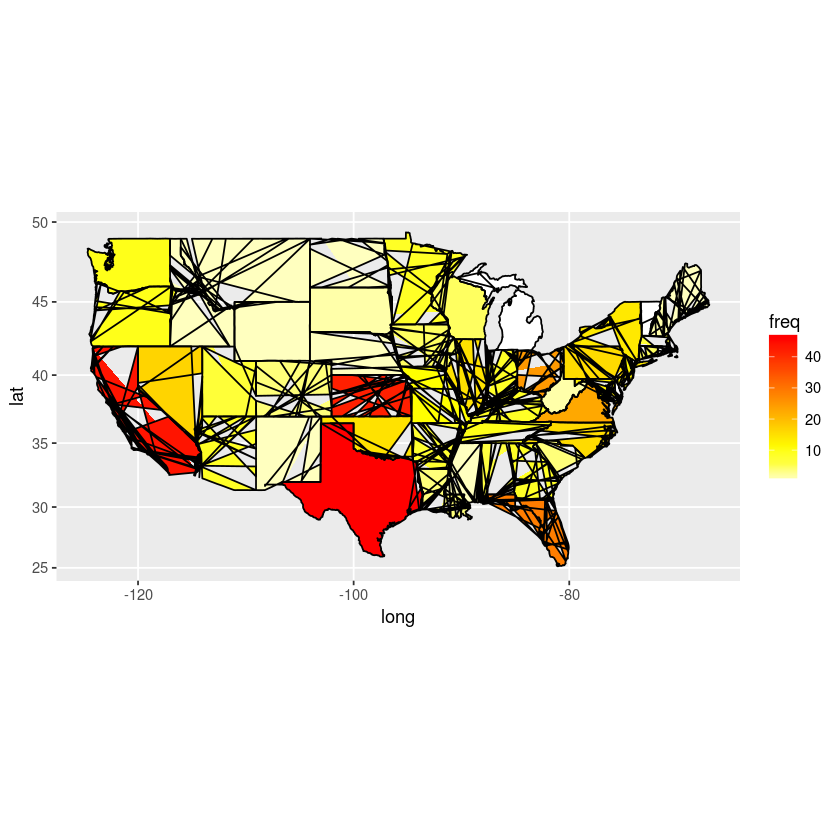

In [244]:
#citation : https://cran.r-project.org/web/packages/fiftystater/vignettes/fiftystater.html

library(ggplot2)
library(maps)
states<-map_data("state")

#states



heatmap$region = trimws(heatmap$states)
heatmap = subset(heatmap, select=-c(states))
#heatmap

merged<- merge(states,heatmap, by="region", all.x=T)

ggplot(merged, aes(x=long, y=lat, group=group))+
geom_polygon(aes(fill=freq))+
  geom_path()+ 
  scale_fill_gradientn(colours=rev(heat.colors(10)),na.value="white")+
  coord_map()
